# Школа машинного обучения

### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Дедлайн: 4 апреля 23: 59 (MSK)


## Домашнее задание 2
### Метод k-ближайших соседей 
---


In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import collections
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as sps
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

**Вопрос:** Почему важно, чтобы в тестовой и обучающей выборке пропорции классов были максимально похожи? В качестве примера рассмотрите Ирисы Фишера: в нём три класса, каждый занимает по трети датасета. Далее мы разделяем выборку в пропорциях 2:1, например, при кросс-валидации с тремя фолдами. Что может пойти не так?

В этом ноутбуке за равенство классов отвечает StratifiedKFold (см. пример ниже, подробнее: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

*тут ваш ответ*
В датасете Ирисы Фишера на 150 сэмплов содержится равное количество цветков каждого класса, по 50 штук. Поэтому при разделении 2:1 может произойти следующая ситуация: в тестовой выборке окажутся все представители первого класса, а в тренировочной не будет ни одного. В этом случае не выполнится ни одно предсказание.

**Задание 1** Примените kNN к классическому <a href="https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0">набору данных "Ирисы Фишера" </a>. Подберите оптимальное число k c помощью поиска по сетке и кросс-валидации. Постройте график зависимости качества от k. Используйте метрику accuracy.

In [2]:
data = load_iris()

X = data.data
y = data.target

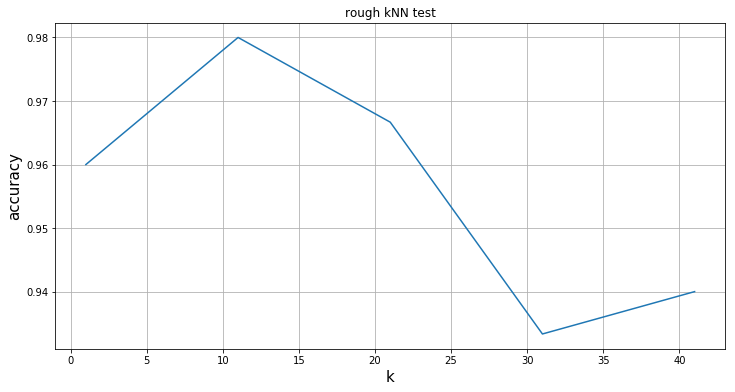

In [3]:
# Вы уже умеете пользоваться GridSearchCV (см семинар по knn)
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.array(np.arange(1,51,10), dtype=int)}

gscv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy")
gscv.fit(X, y)

plt.figure(figsize=(12, 6))
plt.plot(knn_grid["n_neighbors"],gscv.cv_results_["mean_test_score"])
plt.xlabel("k", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.title("rough kNN test")
plt.grid()
plt.show()

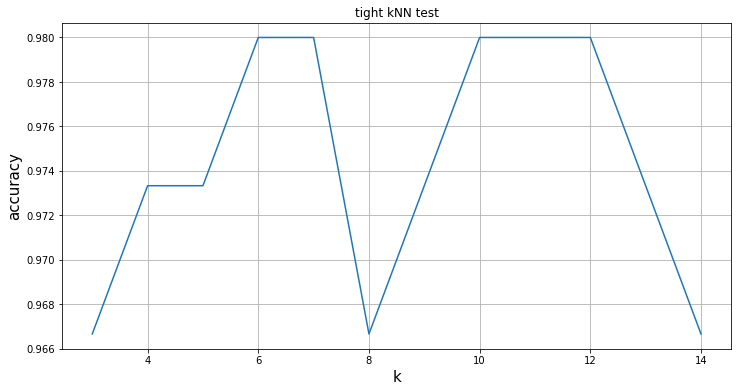

In [4]:
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.array(np.arange(3,15,1), dtype=int)}

gscv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy")
gscv.fit(X, y)

plt.figure(figsize=(12, 6))
plt.plot(knn_grid["n_neighbors"],gscv.cv_results_["mean_test_score"])
plt.xlabel("k", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.title("tight kNN test")
plt.grid()
plt.show()

Если вы смотрели в данные, то вы видели, что признаки примерно одного порядка, т.к. это длины и ширины в сантиметрах. Предположим теперь, что один из признаков измерялся в десятых долях миллиметра. Точно так же подберите оптимальное k для новых данных, сравните качество и постройте график. Что нужно делать, чтобы такая проблема не возникала?

In [5]:
X_new = X * np.array((100, 1, 1, 1))
X_new[:5]

array([[5.1e+02, 3.5e+00, 1.4e+00, 2.0e-01],
       [4.9e+02, 3.0e+00, 1.4e+00, 2.0e-01],
       [4.7e+02, 3.2e+00, 1.3e+00, 2.0e-01],
       [4.6e+02, 3.1e+00, 1.5e+00, 2.0e-01],
       [5.0e+02, 3.6e+00, 1.4e+00, 2.0e-01]])

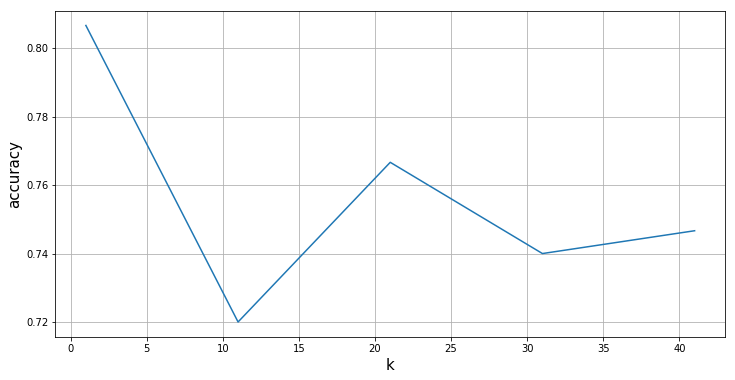

In [6]:
# Запутите код, который вы уже написали выше на данных (X_new, y)
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.array(np.arange(1,50,10), dtype=int)}

gscv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy")
gscv.fit(X_new, y)

plt.figure(figsize=(12, 6))
plt.plot(knn_grid["n_neighbors"],gscv.cv_results_["mean_test_score"])
plt.xlabel("k", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.grid()
plt.show()

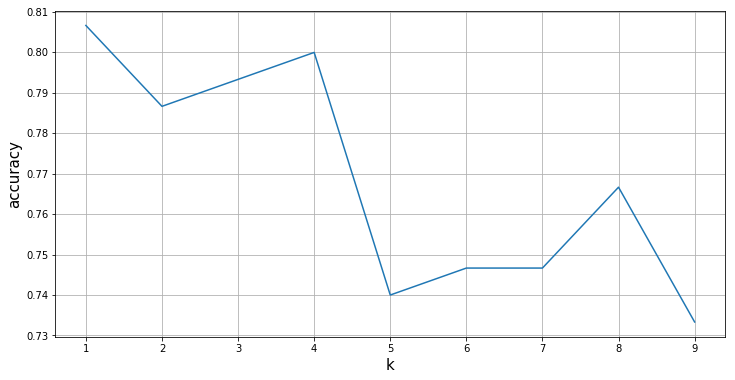

In [7]:
# Запутите код, который вы уже написали выше на данных (X_new, y)
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.array(np.arange(1,10), dtype=int)}

gscv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy")
gscv.fit(X_new, y)

plt.figure(figsize=(12, 6))
plt.plot(knn_grid["n_neighbors"],gscv.cv_results_["mean_test_score"])
plt.xlabel("k", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.grid()
plt.show()

Данный пример показывает изменение точности и оптимального параметра метода при изменении единиц измерения данных. Поскольку физический смысл задачи не изменился, алгоритм показывает некорректное поведение. Справиться с подобной проблемой можно за счет масштабирования данных. 

**Задание 2:** Реализуйте kNN. Cравните скорости работы реализации с distance_slow,  distance_fast c реализацией из sklearn. Проверьте, что качество такое же. 
Считать, что интерфейс fit и predict такой же, как у KNeighborsClassifier из sklearn

In [8]:
def distance_slow(v, a_list):
    """
    Функция, по вектору v и спиcку векторов a
    находящая попарные расстояния v <-> a[i]
    и возвращающая их как numpy.ndarray той же длины,
    что и список a
    (Работает медленно)
    """
    result = []
    for i in range(a_list.shape[0]):
        length = 0.
        for j in range(a_list.shape[1]):
            length += (v[j] - a_list[i, j]) ** 2
        result.append(length)
    return np.array(result)

In [9]:
def  distance_fast(v, a_list):
    """
    Аналог distance_slow. Использует numpy, работает быстро.
    """
    return [((v-a_list[i])**2).sum() for i in range(a_list.shape[0])]


def distance_fast2(v, a_list):
    """
    Аналог distance_slow. Использует numpy, работает быстро.
    """
    return list(((np.outer(np.zeros(a_list.shape[0])+1,v) - a_list)**2).sum(1))

#Оба через numpy, но какой же из них быстрее?

In [10]:
dim = 5000 
n = 500
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional bigger than amount of vectors")
%time print("slow  method: ", end=""); distance_slow(v, a)
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)


dim = 500
n = 5000
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional smaller than amount of vectors")
%time print("slow  method: ", end=""); distance_slow(v, a)
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)


dim = 50000
n = 5000
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional bigger than amount of vectors, and they are huge for my laptop")
%time print("slow  method: is dead...", end=""); #distance_slow(v, a) 
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)


dim = 5000
n = 50000
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional smaller than amount of vectors, and they are huge for my laptop")
%time print("slow  method: is dead...", end=""); #distance_slow(v, a) 
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)


dim = 5000000
n = 50
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional bigger than amount of vectors, and they are tremendous for my laptop")
%time print("slow  method: is dead...", end=""); #distance_slow(v, a) 
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)


dim = 50
n = 5000000
a = np.random.sample((n,dim))
v = np.random.sample((dim,))
print("\nDimensional smaller than amount of vectors, and they are tremendous for my laptop")
%time print("slow  method: is dead...", end=""); #distance_slow(v, a) 
%time print("fast  method: ", end=""); distance_fast(v, a)
%time print("fast2 method: ", end=""); distance_fast2(v, a)

pass


Dimensional bigger than amount of vectors
slow  method: Wall time: 2.21 s
fast  method: Wall time: 11 ms
fast2 method: Wall time: 27 ms

Dimensional smaller than amount of vectors
slow  method: Wall time: 2.2 s
fast  method: Wall time: 47 ms
fast2 method: Wall time: 27 ms

Dimensional bigger than amount of vectors, and they are huge for my laptop
slow  method: is dead...Wall time: 0 ns
fast  method: Wall time: 639 ms
fast2 method: Wall time: 2.7 s

Dimensional smaller than amount of vectors, and they are huge for my laptop
slow  method: is dead...Wall time: 0 ns
fast  method: Wall time: 1.1 s
fast2 method: Wall time: 2.68 s

Dimensional bigger than amount of vectors, and they are tremendous for my laptop
slow  method: is dead...Wall time: 0 ns
fast  method: Wall time: 1.9 s
fast2 method: Wall time: 2.63 s

Dimensional smaller than amount of vectors, and they are tremendous for my laptop
slow  method: is dead...Wall time: 0 ns
fast  method: Wall time: 35 s
fast2 method: Wall time: 3.02

In [11]:
test_time = {'slow': ["2.07 s", "2.14 s", "dead", "dead", "dead", "dead"], 
             'fast': ["12 ms", "48 ms", "621 ms", "1.11 s", "1.91 s", "36 s"], 
             'fast2': ["27 ms", "32 ms", "2.59 s", "2.68 s", "2.63 s", "3.05 s"]}
test_time = pd.DataFrame(test_time, index=["dim > amt, norm", "dim < amt, norm", 
                                           "dim > amt, huge", "dim < amt, huge", 
                                           "dim > amt, trem", "dim < amt, trem" ])
test_time


,fast,fast2,slow
"dim > amt, norm",12 ms,27 ms,2.07 s
"dim < amt, norm",48 ms,32 ms,2.14 s
"dim > amt, huge",621 ms,2.59 s,dead
"dim < amt, huge",1.11 s,2.68 s,dead
"dim > amt, trem",1.91 s,2.63 s,dead
"dim < amt, trem",36 s,3.05 s,dead


Обычно число сэмплов много больше числа признаков, что делает метод fast2 предпочтительным для реальных задач на больших выборках.
Однако, если выборка небольшая, или признаков у объекта много больше чем самих объектов, лучше работает fast, также он требует меньше памяти.

In [12]:
class kNNClassifier:
    def __init__(self, k=3, distance = distance_fast2):
        """
        Parameters
        ----------
        k: int
            Число соседей

        distance: *alias
            функция, по вектору v и спиcку векторов a
            находящая попарные расстояния v <-> a[i]
            и возвращающая их как numpy.ndarray той же длины,
            что и список a
        """
        self._k = k
        self._distance = distance
    
    def fit(self, X_train, y_train):
        self._X = np.copy(X_train)  # Копируем данных, чтобы они не перезаписывались извне
        self._y = np.copy(y_train)
        return self
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        objects_count = X_test.shape[0]
        for i in range(objects_count):
            pairwise_distances = self._distance(X_test[i], self._X)
            
            k_nearest = self._y[np.argsort(pairwise_distances)[:self._k]]  # нашли k ближайших.
            
            #< .. используйте numpy.unique с return_counts=True, 
            #                            чтобы найти какие классы есть среди k соседей 
            #                            и сколько раз каждый из них встречается .. >
            unique_values, counts = np.unique(k_nearest, return_counts=True)
            
            
            prediction = unique_values[np.argmax(counts)]
            # Предсказываем класс, представителей которого больше всего
            
            predictions.append(prediction) 
            
        return predictions
    
    def get_params(self, deep=False):
        """
        Функция, необходимая для работы GridSearchCV
        Возвращает параметры данного экземпляра класса
        """
        return {
            "k": self._k,
            "distance": self._distance
        }
    
    def set_params(self, **params):
        """
        Функция, необходимая для работы GridSearchCV
        Устанавливает параметры из params 
        (В данном случае пересоздаёт экземпляр класса 
        и возвращает его)
        """
        self.__init__(**params)
        return self
    

In [13]:
clf = kNNClassifier(k = 3)
cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=4, shuffle = False), scoring="accuracy", )

array([0.97435897, 0.94871795, 0.91666667, 1.        ])

In [14]:
%%time
clf = kNNClassifier()
params = {
    "k":[1, 3, 5, 7, 9, 11, 13, 15, 17],
    "distance":[distance_slow]
}
gscv = GridSearchCV(clf, params, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy", )
gscv.fit(X, y)
print("Best params: {}. Best score: {}".format(gscv.best_params_, gscv.best_score_))

Best params: {'distance': <function distance_slow at 0x000000000CFA1158>, 'k': 7}. Best score: 0.98
Wall time: 3.83 s


In [15]:
%%time
clf = kNNClassifier()
params = {
    "k":[1, 3, 5, 7, 9, 11, 13, 15, 17],
    "distance":[distance_fast]
}
gscv = GridSearchCV(clf, params, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy", )
gscv.fit(X, y)
print("Best params: {}. Best score: {}".format(gscv.best_params_, gscv.best_score_))

Best params: {'distance': <function distance_fast at 0x000000000CFA1620>, 'k': 7}. Best score: 0.98
Wall time: 6 s


In [16]:
%%time
clf = kNNClassifier()
params = {
    "k":[1, 3, 5, 7, 9, 11, 13, 15, 17],
    "distance":[distance_fast2]
}
gscv = GridSearchCV(clf, params, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy", )
gscv.fit(X, y)
print("Best params: {}. Best score: {}".format(gscv.best_params_, gscv.best_score_))

Best params: {'distance': <function distance_fast2 at 0x000000000CFA1730>, 'k': 7}. Best score: 0.98
Wall time: 698 ms


In [17]:
%%time
clf = KNeighborsClassifier(n_neighbors=3)
params = {
    "n_neighbors":[1, 3, 5, 7, 9, 11, 13, 15, 17],
}
gscv = GridSearchCV(clf, params, cv=StratifiedKFold(shuffle = False, n_splits=5), scoring="accuracy", )
gscv.fit(X, y)
print("Best params: {}. Best score: {}".format(gscv.best_params_, gscv.best_score_))

Best params: {'n_neighbors': 7}. Best score: 0.98
Wall time: 110 ms


**Комментарий:** Интересующиеся могут изучить <a href="https://habrahabr.ru/post/312882/">kd-tree</a>, позволяющее рассматривать меньшее число расстояний. Так же эта структура используется для отрисовки компьютерной графики.

**Задача 3:** Пусть в данных предыдущей задачи мы получили измерения только двух признаков. Тогда признаки одного обьекта можно представить как точку на плоскости, которой в соответствие поставлен некоторый класс (можно визуализировать это как цвет). Постройте графики, изображающие принадлежность всех точек плоскости к классам для различных k.

In [18]:
data = load_iris()
estimations = [False, True, True, False]
X = data.data[:, estimations]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


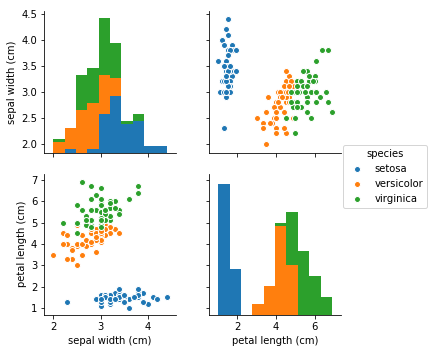

In [19]:
# Визуализация исходных данных
iris2_plot = pd.concat([pd.DataFrame(X, columns=np.array(data.feature_names)[estimations]),
                        pd.DataFrame([data.target_names[i] for i in data.target], columns = ["species"])],
                       axis=1)
sns.pairplot(iris2_plot, hue="species")

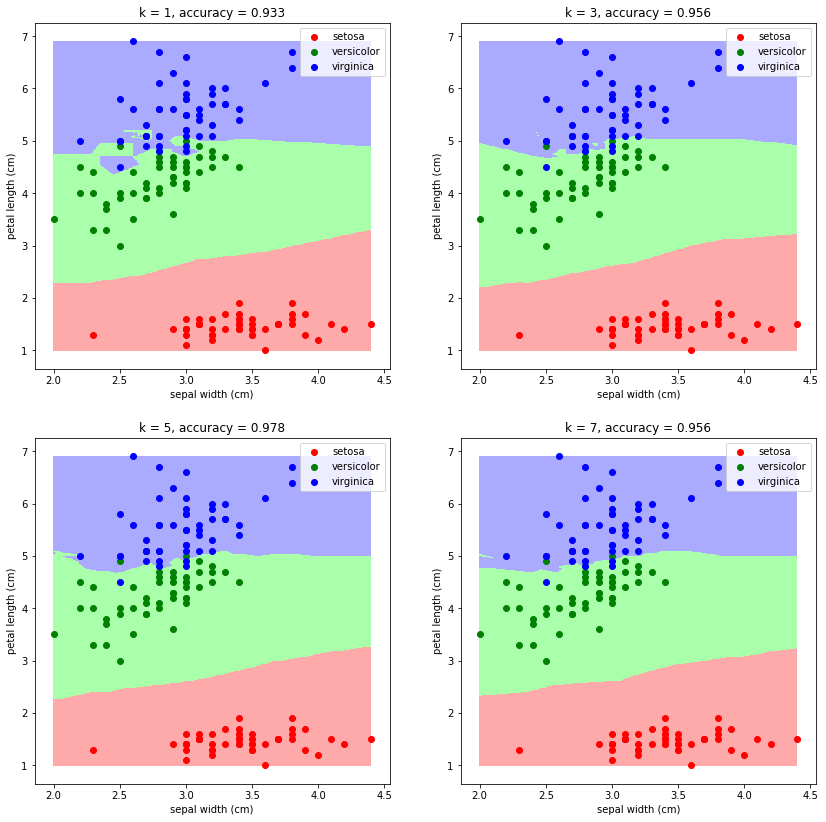

Wall time: 1min 9s


In [20]:
%%time
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.figure(figsize=(14, 14))
for i, k in enumerate([1, 3, 5, 7]):
    plt.subplot(221 + i)

    h = 400
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), h),
        np.linspace(X[:, 1].min(), X[:, 1].max(), h)
    )
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
        
    # Обучите (k)NN на данных X_train, y_train
    knn = kNNClassifier(k)
    knn.fit(X_train, y_train)
    
    #< .. предсказание на X_grid .. >
    Z = knn.predict(X_grid)
    #< .. вычислите качество на y_test, X_test. Используйте функцию accuracy_score .. >
    acc = accuracy_score(y_test, knn.predict(X_test))
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    
    plt.title("k = {}, accuracy = {}".format(k, round(acc, 3)))
    zz = np.array(Z).reshape(xx.shape)
   
    # Вызовите plt.pcolormesh для точек xx, yy, zz и цветовой схемы cmap
    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html
    plt.pcolormesh(xx, yy, zz, cmap=cmap)
    
    
    plt.xlabel(data["feature_names"][1])
    plt.ylabel(data["feature_names"][2])
    for i in range(3):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=["red", "green", "blue"][i], label=data["target_names"][i])
    plt.legend()
    
plt.show()

In [21]:
# Fast2: 1 min 13 sec
# Fast:  8 min 43 sec

Как меняется форма разделяющей кривой при увеличении k и как это сказывается на тестовом качестве? Не забывайте, что иногда в данных встречаются недостоверные измерения, вызванные множеством факторов, например, проблемами при переводе данных из одного формата в другой, в том числе при занесении непосредственных измерений в компьютер.

In [1]:
# При увеличении k форма разделяющей кривой становится более прямой и плавной, что отвечает "упрощению" построенной модели классификации. Это сказывается на тестовом качестве в положительную сторону. 
#-При маленьких k появляется сильное влияние выбросов
#-При очень больших k появляется учет слишком далеких соседей
#-Существует некое оптимальное значение  учтенных соседей (может быть несколько) 

**Задание 4*:** Предлагается датасет, состоящий из писем на две тематики. Задача - научиться классифицировать письма по темам.

In [22]:
categories = [
    'rec.autos',  # тем больше, чем две. Попробуйте другие.)
    'sci.space',
]

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

X = dataset.data
y = dataset.target

In [23]:
len(X), len(y), y

(1977, 1977, array([1, 0, 0, ..., 0, 1, 0], dtype=int64))

Рассмотрим два письма из выборки

In [24]:
print(X[-2])  # Класс 1

From: prb@access.digex.net (Pat)
Subject: Re: HST Servicing Mission Scheduled for 11 Days
Organization: Express Access Online Communications USA
Lines: 14
NNTP-Posting-Host: access.digex.net

In article <C6A2At.E9z@zoo.toronto.edu> henry@zoo.toronto.edu (Henry Spencer) writes:
>
>No, the thing is designed to be retrievable, in a pinch.  Indeed, this
>dictated a rather odd design for the solar arrays, since they had to be
>retractable as well as extendable, and may thus have indirectly contributed
>to the array-flapping problems.


Why not design the solar arrays to be detachable.  if the shuttle is going
to retunr the HST,  what bother are some arrays.  just fit them with a quick release.

one  space walk,  or use the second canadarm to remove the arrays.

pat



In [25]:
print(X[2])  # Класс 0

From: aas7@po.CWRU.Edu (Andrew A. Spencer)
Subject: Re: MR2 - noisy engine.
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 33
Reply-To: aas7@po.CWRU.Edu (Andrew A. Spencer)
NNTP-Posting-Host: slc5.ins.cwru.edu


In a previous article, eliot@lanmola.engr.washington.edu (eliot) says:

>In article <1r1vofINN871@usenet.pa.dec.com> tomacj@opco.enet.dec.com (THUNDERBIRDS ARE GO !!!) writes:
>>	Are there any MR2 owners or motor-head gurus out there, that know why
>>my MR2's engine sounds noisy? The MR2's engine is noisy at the best of times, 
>>but not even a nice nose - it's one of those very ugly noises. 
>
>assuming yours is a non turbo MR2, the gruffness is characteristic of
>a large inline 4 that doesn't have balance shafts.  i guess toyota
>didn't care about "little" details like that when they can brag about
>the mid engine configuration and the flashy styling.
>
>myself, i automatically cross out any car from consideration (or
>recommendation) which has an i

В целом, после прочтения понятно, что первое письмо про космос а второе - про машины. Для того, чтобы классифицировать тексты, нужно перевести их в удобный для алгоритма вид, т.е. сделать из письма вектор. 
Прделагается делать это так: составить список всех используемых слов. Зафиксировать число N самых популярных слов, которые мы будет рассматривать. Каждому письму сопоставлять вектор длины N следующего вида: в a[i] записано число вхождений i-го по популярности слова. Данную задачу решает CountVectoizer: используя его преобразуйте тексты в векторы и подсчитайте качество (accuracy) на классификации.

In [26]:
vect = CountVectorizer(max_features=50)
vect.fit(X)
Xt = vect.transform(X)
Xt = Xt.toarray()

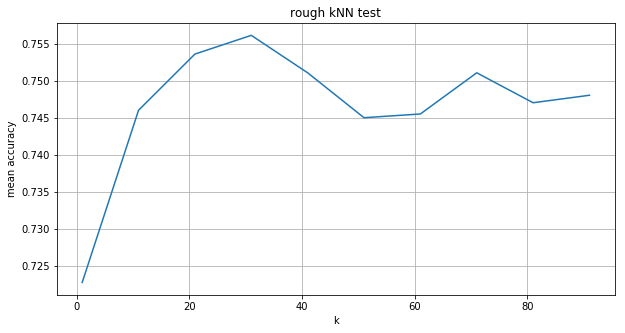

In [27]:
# Проверьте качество kNN на данных Xt, y.  Метрика - accuracy
knn_grid = {"k": np.arange(1, 101, 10)}
knn = kNNClassifier()
grcv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), 
                    scoring="accuracy")
grcv.fit(Xt, y)

plt.figure(figsize=(10, 5))
plt.plot(knn_grid['k'], grcv.cv_results_["mean_test_score"])
plt.xlabel("k")
plt.ylabel("mean accuracy")
plt.title("rough kNN test")
plt.grid()
plt.show()

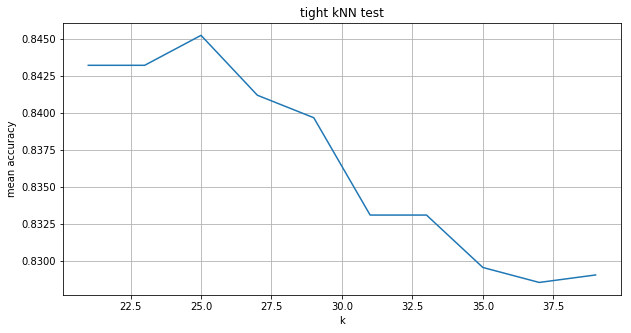

In [40]:
# Проверьте качество kNN на данных Xt, y.  Метрика - accuracy
knn_grid = {"k": np.arange(21, 40, 2)}
knn = kNNClassifier()
grcv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), 
                    scoring="accuracy")
grcv.fit(Xt, y)

plt.figure(figsize=(10, 5))
plt.plot(knn_grid['k'], grcv.cv_results_["mean_test_score"])
plt.xlabel("k")
plt.ylabel("mean accuracy")
plt.title("tight kNN test")
plt.grid()
plt.show()

In [41]:
# Попробуем еще раз, с известным k
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.33, random_state=42)

k = knn_grid['k'][grcv.cv_results_["mean_test_score"].argmax()]
knn = kNNClassifier(k=32)
knn.fit(X_train, y_train)
print("Accuracy of kNN method with optimal k={} is {:.2f}".format(
    k, accuracy_score(y_test, knn.predict(X_test))))


Accuracy of kNN method with optimal k=25 is 0.82


Очевидна проблема: самые часто встречающиеся слова встречаются одинаково часто во всех текстах: это a, the, и прочие.
Для этой проблемы также существует стандартное решение: Проверьте качество теперь:

In [42]:
# Создайте экземпляр CountVectorizer с параметрами max_features=50, stop_words="english"
# Как в примере выше, преобразуйте X в Xt

vect = CountVectorizer(max_features=50, stop_words="english")
vect.fit(X)
Xt = vect.transform(X).toarray()

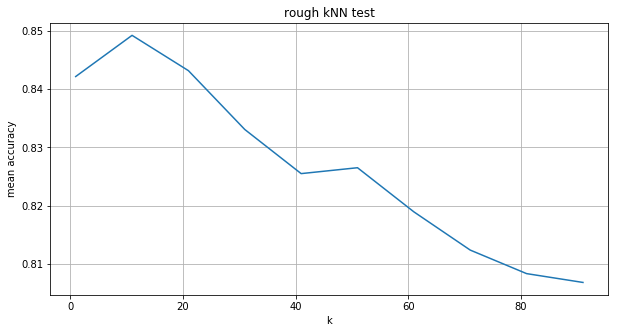

In [43]:
# Проверьте качество kNN на данных Xt, y.  Метрика - accuracy
knn_grid = {"k": np.arange(1, 101, 10)}
knn = kNNClassifier()
grcv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), 
                    scoring="accuracy")
grcv.fit(Xt, y)

plt.figure(figsize=(10, 5))
plt.plot(knn_grid['k'], grcv.cv_results_["mean_test_score"])
plt.xlabel("k")
plt.ylabel("mean accuracy")
plt.title("rough kNN test")
plt.grid()
plt.show()

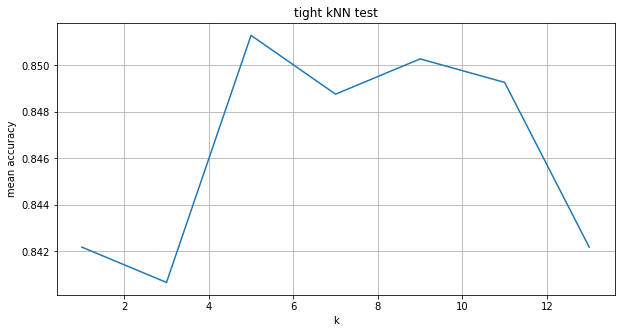

In [44]:
# Проверьте качество kNN на данных Xt, y.  Метрика - accuracy
knn_grid = {"k": np.arange(1, 15, 2)}
knn = kNNClassifier()
grcv = GridSearchCV(knn, knn_grid, cv=StratifiedKFold(shuffle = False, n_splits=5), 
                    scoring="accuracy")
grcv.fit(Xt, y)

plt.figure(figsize=(10, 5))
plt.plot(knn_grid['k'], grcv.cv_results_["mean_test_score"])
plt.xlabel("k")
plt.ylabel("mean accuracy")
plt.title("tight kNN test")
plt.grid()
plt.show()

In [45]:
# Попробуем еще раз, с известным k
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.33, random_state=0)

k = knn_grid['k'][grcv.cv_results_["mean_test_score"].argmax()]
knn = kNNClassifier(k)
knn.fit(X_train, y_train)
print("Accuracy of kNN method with optimal k={} is {:.3f}".format(
    k, accuracy_score(y_test, knn.predict(X_test))))


Accuracy of kNN method with optimal k=5 is 0.836


Нетрудно догадаться, какие слова будут самыми популярными:

In [46]:
vect.transform(["cake space space car car car"]).toarray()

array([[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

Качество метрических алгоритмов очень сильно зависит от метрики (функции расстояния). Сравните качество метрик "minkowski" и "cosine" - последняя считает величину, численно равную единице минут косинус угла между векторами, что более уместно для текстов, что обычная евклидова метрика (metric="minkowski", p=2). Найдите параметры, на которых достигается лучшее качество.

In [47]:
params = {
    "n_neighbors": range(1, 15, 2), 
    "metric": ["minkowski", "cosine"]
}
# Вы знаете, что делать.)

knn = KNeighborsClassifier()
grcv = GridSearchCV(knn, params, cv=StratifiedKFold(shuffle=False, n_splits=5), scoring="accuracy")
grcv.fit(Xt, y)
print("Best params are: {}, best score is: {:.3f}".format(grcv.best_params_, grcv.best_score_))


Best params are: {'metric': 'cosine', 'n_neighbors': 5}, best score is: 0.881


__________________
**Замечание:**
Известна проблема несовместимости версий sklearn: метрика "cosine" не доступна в старых версиях sklearn.

Учитывая, что самый важный навык в IT-профессиях это умение пользоваться поисковиком (и читать технические тексты, например, документации), предлагаются следующие варианты:

- использовать sklearn версии 0.19.1
    (вы быстро разберётесь, как узнать текущую версию и как её обновить, это полезно знать)
    
    
- написать метрику cosine_distances для своего класса и использовать её.

    В sklearn реализована похожая функция, можете использовать её, но никто не запрещает написать свою реализацию.
    Обратите внимание, что CountVectorizer возвращает объект класса scipy.sparse.csr.csr_matrix, к чему вы, наверное,
    не были готовы при реализации класса, так что нужно преобразовать Xt к numpy.ndarray (документация в помощь)
    
    Обьект класса scipy.sparse.csr.csr_matrix используется так как матрицы, возвращаемые CountVectorizer, обычно почти
    полностью состоят из нулей и использование разреженных матриц сильно экономит оперативную память. Такие матрицы имеют
    схожие с numpy.ndarray интерфейсы, но совместимость не полная. 
    
    
________________________

При большом числе признаков метрические алгоритмы обычно плохо работают, подробнее: <a href="https://en.wikipedia.org/wiki/Curse_of_dimensionality">проклятие размерности </a>.

<!--- shevkunov.ks@phystech.edu -->